## 线性判别分析(Linear Discriminant Anaysis)
线性判别分析，简称LDA,是一种经典的线性学习方法。在二分类问题上最早由Fisher提出，也称"Fisher判别分析"。    
> 在主成分分析原理总结中，我们对降维算法PCA进行了总结。这里的LDA是另一种经典的的降维算法。使用PCA进行降维，我们没有将类别考虑进去，属于无监督学习。而LDA是一种监督学习的降维技术，即它的每个样本是有类别输出的。  

## 1. LDA的思想
给定训练样例集，设法将样例投影到一条直线上，使得同类样例的投影点尽可能接近，异类样例的投影点尽可能远离；在对新样本进行分类时，将其投影到同样的这条直线上，再根据投影点的位置来确定新样本的类别。  
用一句话概括就是：投影后类内方差最小，类间方差最大。  
- 示意图如下：  
对于二维空间来说，显然右图的投影方式能够更好的满足我们的要求。

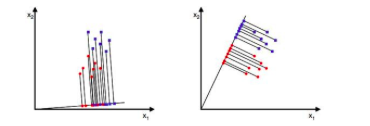

In [2]:
from IPython.display import Image
Image('/Users/shangshuhan/practice/15.png')

## 2. 瑞利商与广义瑞利商(Rayleigh quotient)
- 瑞利商定义：瑞利商是指这样的函数$R(A,x)$:  
$$R(A,x)=\dfrac{x^HAx}{x^Hx}$$  
其中$x$为非零向量，而A为$n\times n$的Hermitan矩阵。所谓的Hermitan矩阵就是它的共轭转置等于它本身，属于推广的对称矩阵，即$A^H=A$.如果A是实对称阵，$A^T=A$即为Hermitan矩阵。  
瑞利商$R(A,x)$有 一个非常重要的性质，即它的最大值等于矩阵A的最大特征值，而最小值等于矩阵A的最小的特征值，也就是满足：  
$$\lambda_{min}\le \dfrac{x^HAx}{x^Hx}\le \lambda_{max}$$  
当向量x是标准正交基时，即满足$x^Hx=1$时，瑞利商退化为：  
$$R(A,x)=x^HAx$$,这个形式在谱聚类和PCA中都有出现。  
- 广义瑞利商：是指这样的函数$R(A,B,x)$:  
$$R(A,B,x)=\dfrac{x^HAx}{x^HBx}$$  
其中x为非零向量，而A,B为$n\times n$的Hermitan矩阵，B为正定矩阵。   
> 它的最大值和最小值是什么？  
我们令$x'=B^{-1/2}x$,则分母转化为：
$$x^HBx=x'^H(B^{-1/2})^HBB^{-1/2}x'=x'^Hx'$$  
而分子转化为：  
$$x^HAx=x'^HB^{-1/2}AB^{-1/2}x'$$  

此时我们的$R(A,B,x)$转化为$R(A,B,x')$:  
$$ R(A,B,x')=\dfrac{x'^HB^{-1/2}AB^{-1/2}x'}{x'^Hx'}$$  
由前面瑞利商的性质，我们可以知道$R(A,B,x)$的最大值和最小值分别为矩阵$B^{-1/2}AB^{-1/2}$的最大特征值和最小特征值,或者说是$B^{-1}A$的最大特征值和最小特征值。  

## 3. 回到LDA-考虑二分类问题
给定数据集$D={\{(x_i,y_i)}\}_{i=1}^m,y_i\in{\{0,1}\}$,令$X_i,\mu_i,\Sigma_i$分别代表第$i\in{\{0,1}\}$类示例的集合、均值向量、协方差矩阵。   

若将数据投影到直线w上，则两类样本的中心在直线上的投影分别为$w^T\mu_0$,$w^T\mu_1$;若将所有样本点都投影在直线上，则两类样本的协方差分别为
$w^T\Sigma_0w$和$w^T\Sigma_1w$.    

由于直线是一维空间，因此，$w^T\mu_0$,$w^T\mu_1$，$w^T\Sigma_0w$和$w^T\Sigma_1w$均为实数。   

要使得同类样例的投影点尽可能接近，可以让同类样例投影点的协方差尽可能小，即$w^T\Sigma_0w+w^T\Sigma_1w$尽可能小；而要使异类样例的投影点尽可能远离，可以让类中心之间的距离尽可能大，即:$\lVert w^T\mu_0-w^T\mu_1\rVert_2^2$尽可能大。  

同时考虑二者，可以得到最大化的目标如下：  
\begin{eqnarray}
J&=&\dfrac{\lVert w^T\mu_0-w^T\mu_1\rVert_2^2}{w^T\Sigma_0w+w^T\Sigma_1w}\notag\\
&=&\dfrac{w^T(\mu_0-\mu_1)(\mu_0-\mu_1)^Hw}{w^T(\Sigma_0+\Sigma_1)w}\notag
\end{eqnarray}  
- 定义“类内散度矩阵”(within-class scatter matrix)：  
\begin{eqnarray}
S_w&=&\Sigma_0+\Sigma_1\notag\\
&=&\sum_{x\in X_0}(x-\mu_0)(x-\mu_0)^T+\sum_{x\in X_1}(x-\mu_1)(x-\mu_1)^T\notag
\end{eqnarray} 
- 定义"类间散度矩阵"(betweent-class scatter matrix)：  
$$S_b=(\mu_0-\mu_1)^T$$. 
则J可重写为：  
$$J=\dfrac{w^TS_bw}{w^TS_ww}\qquad(*)$$  
这就是LDA欲最大化的目标，即$S_b,S_w$的瑞利商。  

## 4. 推导求解
### 4.1 推导
如何确定w？  
注意到(*)式的分子和分母都是关于w的二次项，因此(*)式的解与w的长度无关，只与其方向有关。不失一般性，令$w^TS_ww=1$,则式(*)等价于：  
$$\min_w-w^TS_bw$$
$$ s.t. w^TS_ww=1$$  
由拉格朗日乘子法，上式等价于：  
$$ S_bw=\lambda S_ww\qquad(**)$$  
- 因为 $S_bw=(\mu_0-\mu_1)(\mu_0-\mu_1)^Tw$,其中$(\mu_0-\mu_1)^Tw$是标量，所以$S_bw$的方向恒为$\mu_0-\mu_1$,不妨令：  
$$ S_bw=\lambda(\mu_0-\mu_1)$$  

代入(**)式可得：  
$$w=S_w^{-1}(\mu_0-\mu_1)$$  
- 注意：  
至此，我们只要求出原始样本的均值和方差就可以求出最佳方向w，这就是Fisher于1936年提出的线性判别分析。  

### 4.2 求解
考虑到数值解的稳定性，在实践中，通常是对$S_w$进行奇异值分解，即$S_w=U\Sigma V^T$,这里$\Sigma$是一个实对角矩阵，对角线上的元素是$S_w$的奇异值，然后再由
$S_w^{-1}=V\Sigma^{-1}U^T$得到$S_w^{-1}$,进而求解得到$W$.  
 
- 一旦确定了w，就可以对特征进行降维计算：$y=w^Tx$，将示例的维数从d维降到1维。

## 5. LDA-多分类问题
将LDA推广到多分类任务中，假定存在N个类，且第i类示例数为$m_i$,总示例数为$m$，则$m=\sum_{i=1}^N m_i$.  
- 首先，我们定义“全局散度矩阵”：  
$$S_t=S_b+S_w=\sum_{j=1}^m(x_j-\mu)(x_j-\mu)^T$$
其中，$\mu$是所有示例的均值向量。  
- 其次，我们需要重新定义类内散度矩阵为每个类别的散度矩阵之和：  
$$S_w=\sum_{i=1}^N S_{w_i}$$  
其中，$S_{w_i}=\sum_{x\in X_i}(x-\mu_i)(x-\mu_i)^T$  
- 类间散度矩阵：  
$$S_b=S_t-S_w=\sum_{i=1}^N m_i(\mu_i-\mu)(\mu_i-\mu)^T$$ 
> 计算过程：
$$S_t=\sum_{i=j}^m x_jx_j^T-\sum_{j=1}^m\mu\mu^T=\sum_{j=1}^m x_jx_j^T-\sum_{i=1}^N m_i \mu\mu^T$$  
$$S_w=\sum_{i=1}^N\sum_{x\in X_i} (xx^T-\mu_i\mu_i^T)=\sum_{j=1}^m x_jx_j^T-\sum_{i=1}^Nm_i \mu_i\mu_i^T$$  
则有：  
$S_b=S_t-S_w=\sum_{i=1}^N m_i(\mu_i\mu_i^T-\mu\mu^T)=\sum_{i=1}^N m_i(\mu_i-\mu)(\mu_i-\mu)^T$

### 5.1 推导与计算
由二分类的LDA我们可知，若示例$x$包含d个特征，我们寻找一条直线(方向为$w$)来做投影，寻找最能使样本分离的直线。将示例从d维降到一维。  
当类别变成N个，这里N>2,要使得投影后类别能够分离，降维到一维可能已经不能满足要求，需要将特征将到N-1维。  
多分类LDA有多种实现方法，常见的优化目标为：
$$\max_{W}\dfrac{tr(W^TS_bW)}{W^TS_wW}$$  
其中，$W\in R^{d\times(N-1)}$,$tr(\cdot)$表示矩阵的迹。上式可以通过如下广义特征问题进行求解：  
$$S_bW=\lambda S_wW$$  
W的闭式解是$S_w^{-1}S_b$的$d'$个最大非零广义特征值所对应的特征向量组成的矩阵，$d'\le N-1$.  
- 降维问题：  
若将W视为一个投影矩阵，则多分类LDA将样本投影到$d'$维空间，$d'$常远小于数据原有的属性d。于是，可通过投影来减小样本点的维数，且投影过程中使用了类别信息，故LDA也常被视为一种经典的监督降维技术。 
- 得到W，进行降维计算得到新特征：$y=W^Tx$
**注意**： 
> 由于W是一个利用了样本的类别得到的投影矩阵，因此它降维到的维数最大值为N-1。  
> - 为什么不是N呢？  
因为$S_b$中的每一个$\mu_i-\mu$的秩为1，因此协方差矩阵相加后最大的秩为N(矩阵和的秩小于等于各个矩阵秩的和),但如果我们知道前N-1个$\mu_j$之后，最后一个$\mu_N$可以由前N-1个$\mu_j$线性表示，因此$S_b$的秩最大为N-1个，所以特征向量最多有N-1个。  
> - W中的特征向量不一定是正交的，因为$S_w^{-1}S_b$不一定是实对称阵  

> - 若矩阵$S_w$为奇异矩阵呢？  
在实际应用中存在着许多典型的小样本问题，比如在人脸图像识别问题中，$S_w$通常是奇异的，这是因为待识别的图像矢量维数一般比较高，而在实际问题中难以找到或者根本不可能找到足够多的训练样本来保证$S_w$的可逆性。在这种情况下，可采用的做法是，先用PCA进行降维，再对降维后的数据用LDA.

## 7.
设$f_k(x)$是类G=k中x的类条件密度，而$\pi_k$是类k的先验概率，并且
$\sum_{l=1}^k \pi_k =1$。贝叶斯定理的简单应用给出：
$$P(G=k|X=x)=\dfrac{f_k(x)\pi_k}{\sum_{l=1}^k f_l(x) \pi_l}$$  

朴素贝叶斯模型是线形模型的变种，并假定每个类密度是边缘密度的乘积，
即假定输入在每个类上条件独立。  
假定我们用多元高斯对每个类密度建模：  

$$f_k(x)=\frac{1}{(2\pi)^\frac{p}{2}|\sum_{k}|^{\frac{1}{2}}}e^{-\frac{1}{2}(x-\mu_k)^T{\sum_k}^{-1}(x-\mu_k)}$$  

线性判别分析(LDA)在一种特殊的情况中出现，即当我们假定类具有共同的协方差矩阵$\Sigma_k=\Sigma$,$\forall k$时。比较两个类k和l，只需要考虑对数比率即可，并且有：  
  
  
\begin{equation*}
\begin{aligned}
\log\dfrac{p(G=k|X=x)}{p(G=l|X=x)}&=log\frac{f_k(x)}{f_l(x)}+log\frac{\pi_k}{\pi_l}\\
&=log\frac{\pi_k}{\pi_l}-\frac{1}{2}(\mu_k+\mu_l)^T\Sigma^{-1}(\mu_k-\mu_l)+x^T\Sigma^{-1}(\mu_k-\mu_l)
\end{aligned}
\end{equation*}  

是x的线性方程。由上式可知：线性判别函数   

$$\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+\log \pi_k$$  

是判定规则的等价描述，其中$G(x)=arg\max_k\delta_k(x)$  
在实践中，我们不知道高斯分布的参数，而需要用训练数据估计它们：  

(1)$\hat{\pi}=N_k/N$,其中$N_k$是类k的观测数；  
  
(2)${\hat{\mu}}_k=\sum_{g_i=k} x_i/N_k;$  
  
(3)$\hat{\Sigma}=\sum_{k=1}^K\sum_{g_i=k}(x_i-{\hat{\mu}}_k)(x_i-{\hat{\mu}}_k)^T/(N-k)$  

## 写在最后
### LDA与PCA的比较： 
最大化目标函数J时，PCA最大化‘全局散度矩阵’：$S_t=S_b+S_w$  
LDA最大化‘类间散度矩阵’：$S_b/S_w$  
1. 相同点：  
1)两者都可以对数据进行降维；  
2)两者在降维时均使用了矩阵特征分解的思想；  
3)两者都假设数据符合高斯分布
2. 不同点
1)LDA是有监督的降维方法，而PCA是无监督的降维方法
2)LDA降维最多可以降到类别数-1的维数，而PCA没有这个限制
3)LDA不仅可以降维，还可以用于分类  
4)LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向